In [33]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

import random

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Reshape

#### Загрузим датасет

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Имеем 60000 картинок 28*28

In [29]:
size = X_train.shape[0]
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]
X_train.shape

(60000, 28, 28)

#### Посмотрим на несколько первых картинок

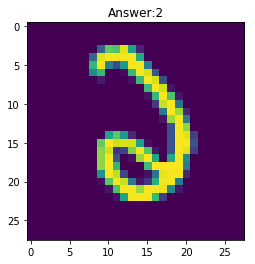

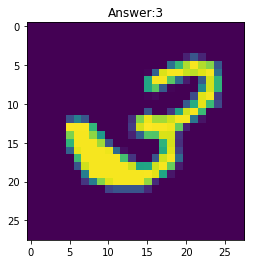

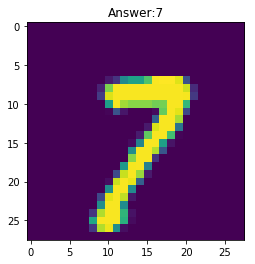

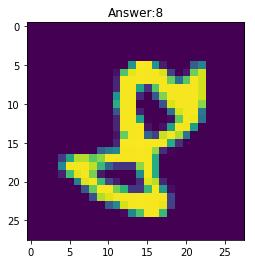

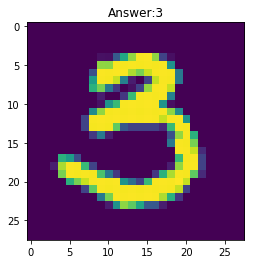

In [31]:
img_size=(img_rows, img_cols)
number_of_img=5
for i in range(number_of_img):
    rand=random.randint(0, size)
    img=np.array(X_train)[rand]
    plt.imshow(img)
    plt.title('Answer:'+str(int(np.array(y_train)[rand])))
    plt.show()

In [56]:
X_train.shape

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### Нормируем значения

In [7]:
X_train = X_train/np.max(X_train)
X_test = X_test/np.max(X_test)

#### Сделаем целевой признак категориальным

In [57]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
n_classes = 10

#### Построим CNN по типу LeNet-5

In [70]:
model = Sequential()
model.add(Reshape((img_rows, img_cols, 1), input_shape=(img_rows, img_cols)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='tanh', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='tanh', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='tanh', padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_17 (Reshape)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
dropout_33 (Dropout)         (None, 7, 7, 128)         0         
__________

In [71]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [73]:
model.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
         verbose=1,
         validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 221s 4ms/step - loss: 0.2390 - acc: 0.9284 - val_loss: 0.0474 - val_acc: 0.9838
Epoch 2/10
60000/60000 [==============================] - 222s 4ms/step - loss: 0.0773 - acc: 0.9770 - val_loss: 0.0512 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0618 - acc: 0.9810 - val_loss: 0.0461 - val_acc: 0.9844
Epoch 4/10
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0549 - acc: 0.9829 - val_loss: 0.0347 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0458 - acc: 0.9861 - val_loss: 0.0404 - val_acc: 0.9862
Epoch 6/10
60000/60000 [==============================] - 220s 4ms/step - loss: 0.0450 - acc: 0.9861 - val_loss: 0.0379 - val_acc: 0.9879
Epoch 7/10
60000/60000 [==============================] - 212s 4ms/step - loss: 0.0453 - acc: 0.9863 - val_loss: 0.0352 - 

In [74]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.031113842614507302
Test accuracy: 0.9905


In [ ]:
'''
from keras.datasets.mnist import load_data

# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()

# display 14 random images from the training set
import numpy as np
np.random.seed(123)

rand_14 = np.random.randint(0, train_digits.shape[0],16)
sample_digits = train_digits[rand_14]
sample_labels = train_labels[rand_14]
# code to view the images
num_rows, num_cols = 2, 8
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 8 + c
        ax[r,c].axis("off")
        ax[r,c].imshow(sample_digits[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % sample_labels[image_index])
plt.show()
plt.close()
'''